# 定义问题

通过数据集：易速鲜花微信软文.csv 预测软文浏览量

# 数据收集和预处理

In [1]:
# 导入最基本的数据处理工具
# import numpy as np # 导入NumPy数学计算工具包
import pandas as pd # 导入Pandas数据处理工具包

In [2]:
df_ads = pd.read_csv('易速鲜花微信软文.csv') # 读入数据
# df_ads.astype(int)
df_ads.head(10) # 显示前几行数据

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004
1,816,816.0,4,6,100004
2,1224,612.0,6,5,164502
3,1261,1261.0,6,6,163001
4,1720,1720.0,7,5,260401
5,1541,1541.0,7,5,220002
6,827,NaN,5,7,107503
7,866,686.0,5,9,110504
8,1314,1300.0,8,5,229461
9,1431,1099.0,6,5,165004


这两行代码是使用 Pandas 库加载并查看 CSV 文件中的数据。这里使用的是易速鲜花微信软文的数据文件。

1. `df_ads = pd.read_csv('易速鲜花微信软文.csv')`：这行代码使用 Pandas 中的 `read_csv()` 函数读取 CSV 文件（易速鲜花微信软文.csv），并将数据存储在名为 df_ads 的 DataFrame 对象中。DataFrame 是 Pandas 库中最重要的数据结构，用于表示表格形式的数据。`pd.read_csv()` 函数会自动将 CSV 文件中的数据转换为 DataFrame 格式。

2. `df_ads.head()`：这行代码用于查看 DataFrame 数据的前几行。默认情况下，`.head()` 方法会返回前 5 行数据。如果你希望查看前 n 行数据，可以向该方法中传递一个整数参数，比如 `df_ads.head(n)`。这对于在数据处理和分析过程中快速了解数据集的结构和内容非常有帮助。

## 数据清洗

In [3]:
df_ads.isna().sum() # NaN出现的次数

点赞数      0
转发数     37
热度指数     0
文章评级     0
浏览量      0
dtype: int64

这段代码使用 Pandas 数据帧（DataFrame）的 `isna()` 和 `sum()` 方法来计算数据帧 `df_ads` 中每一列缺失值（NaN，Not a Number）的数量。

`df_ads.isna()` 返回一个布尔值数据帧，其形状与原数据帧相同。对于原数据帧中的每个元素，如果该元素为 NaN，则在新数据帧（布尔值数据帧）中对应位置的元素值为 True，否则为 False。

然后， `sum()` 方法沿着数据帧的纵轴（默认为 0，即列方向）对布尔值进行累加。True 被认为是 1，而 False 被认为是 0。因此，当我们在布尔值数据帧上使用 `sum()` 方法时，实际上计算的是每列中 True（即 NaN）的数量。

这对于在数据预处理阶段识别和处理缺失值很有帮助。了解缺失值的分布可以帮助你在接下来的数据清洗和填充缺失值时选取更合适的策略，比如删除包含缺失值的行列、使用特定值填充缺失值或使用统计方法（例如平均值、中位数等）填充缺失值等。

In [4]:
# df_ads['转发数'].fillna(df_ads['转发数'].mean(), inplace=True) # 用均值补值

In [5]:
df_ads = df_ads.dropna() # 删除NaN值

## 数据可视化

In [6]:
# 导入数据可视化所需要的库
import matplotlib.pyplot as plt #Matplotlib – Python画图工具库
import seaborn as sns #Seaborn – 统计学数据可视化工具库

这两行代码分别导入了两个用于数据可视化的 Python 库：Matplotlib 和 Seaborn。数据可视化在机器学习任务中非常重要，可以帮助我们更好地理解数据集、发现潜在问题和特征之间的关系。

1. `import matplotlib.pyplot as plt`：这行代码导入名为 Matplotlib 的 Python 绘图库，并为它设置了一个别名 plt。Matplotlib 是一个用于创建图形和数据可视化的库，可以实现条形图、散点图、箱线图等多种类型的图形。使用别名 plt 可以方便地调用 Matplotlib 库中的函数和方法来创建和自定义图形。

2. `import seaborn as sns`：这行代码导入名为 Seaborn 的 Python 数据可视化库，并为它设置了一个别名 sns。Seaborn 基于 Matplotlib 库构建，提供了更高级的统计学数据可视化功能，并拥有更美观的默认主题和颜色。 使用别名 sns 可以方便地调用 Seaborn 库中的函数和方法来创建和自定义图形。与 Matplotlib 相比，Seaborn 更专注于统计学图形，如热力图、联合分布图等。

In [7]:
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

这些命令将字体设置为 SimHei（基本黑体）或者 Microsoft YaHei（雅黑），这两种字体都支持中文字形。请注意，这些字体可能仅在Windows系统上有效。对于其他操作系统，需要使用对应的支持中文的字体。

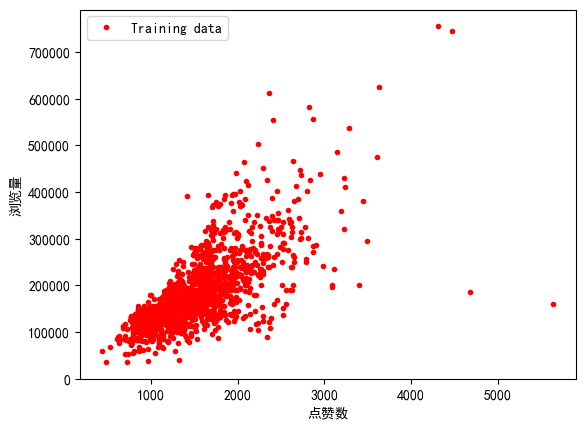

In [8]:
plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data') # 用matplotlib.pyplot的plot方法显示散点图
plt.xlabel('点赞数') # x轴Label
plt.ylabel('浏览量') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果！

这段代码使用 Matplotlib 库中的 pyplot（以 plt 别名导入）绘制了一个散点图，用于展示易速鲜花微信软文数据中点赞数与浏览量之间的关系。以下是各行代码的解释：

1. `plt.plot(df_ads['点赞数'],df_ads['浏览量'],'r.', label='Training data')`：这行代码使用 plt 的 `plot()` 方法创建一个散点图，横轴为点赞数，纵轴为浏览量。`'r.'` 参数表示使用红色（red）的点来表示数据，`label='Training data'` 设置了图例的名称。

2. `plt.xlabel('点赞数')`：这行代码为横轴设置了标签，即“点赞数”。

3. `plt.ylabel('浏览量')`：这行代码为纵轴设置了标签，即“浏览量”。

4. `plt.legend()`：这行代码添加了图例，图例上会显示代表不同数据点的图形和各自的标签，在这个例子中，我们的数据点只有一种类型：“Training data”。

5. `plt.show()`：这行代码用于显示已绘制的图形。在一些编程环境中（如 Jupyter Notebook 和 Google Colab），不需要此行代码，图形会自动显示。但在其他环境中（如普通的 Python 脚本或 IDE），需要使用 `plt.show()` 来展示图形。

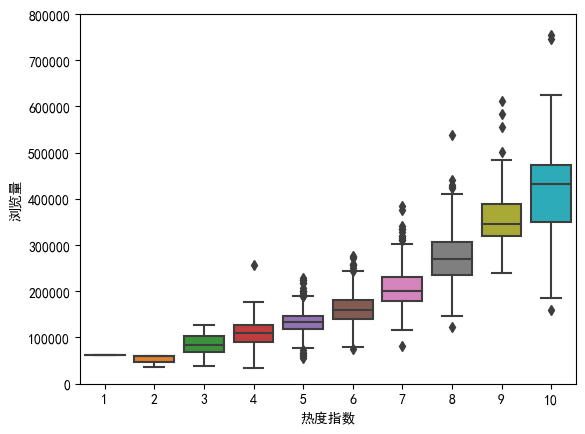

In [9]:
data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1) # 浏览量和热度指数
fig = sns.boxplot(x='热度指数', y="浏览量", data=data) # 用seaborn的箱线图画图
fig.axis(ymin=0, ymax=800000); #设定y轴坐标

这段代码使用 Seaborn 库（以 `sns` 别名导入）绘制了一个箱线图，展示了易速鲜花微信软文数据中浏览量与热度指数之间的关系。以下是各行代码的解释：

1. `data = pd.concat([df_ads['浏览量'], df_ads['热度指数']], axis=1)`：这行代码将 `df_ads` 数据帧中的浏览量和热度指数两列拼接在一起，创建一个新的数据帧 `data`。

2. `fig = sns.boxplot(x='热度指数', y="浏览量", data=data)`：这行代码使用 Seaborn 的 `boxplot()` 函数创建一个箱线图，横轴为热度指数，纵轴为浏览量。函数的 `data` 参数传入我们之前拼接好的 `data` 数据帧。此时，`fig` 是一个 Matplotlib 的 `Axes` 对象，可以用于对图形进行进一步定制。

3. `fig.axis(ymin=0, ymax=800000)`：这行代码设置了纵轴的范围，最小值为 0，最大值为 800000。通过设定 `y` 轴坐标范围，我们可以更好地观察两个变量之间的关系。

箱线图可以帮助我们了解数据的分布情况、中位数、四分位数等统计特征，还可以观察到异常值。

## 特征工程

In [10]:
X = df_ads.drop(['浏览量'],axis=1) # 特征集，Drop掉便签相关字段
y = df_ads.浏览量 # 标签集

上述两行代码通过从原始数据集 `df_ads` 中分离和提取特征集和标签集，为接下来构建和训练监督学习模型做了准备。具体来说：

1. 第一行代码从 `df_ads` 中删除了 '浏览量' 这一列，并将剩余的所有列作为特征集（输入）赋值给了变量 `X`。
2. 第二行代码从 `df_ads` 中提取了 '浏览量' 这一列，并将其作为标签集（目标变量/输出）赋值给了变量 `y`。

通过这两个步骤，你已经成功地将原始数据集划分为特征集（X）和标签集（y），使得你可以用这些数据训练和评估机器学习模型。这是监督学习任务中构建模型的一个基本步骤。

In [11]:
X.head() # 显示前几行数据

,点赞数,转发数,热度指数,文章评级
0,2646,1347.0,7,5
1,816,816.0,4,6
2,1224,612.0,6,5
3,1261,1261.0,6,6
4,1720,1720.0,7,5


In [12]:
y.head() # 显示前几行数据

0    260004
1    100004
2    164502
3    163001
4    260401
Name: 浏览量, dtype: int64

## 拆分训练集和验证集

In [13]:
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=10)

这段代码实现了将特征集 `X` 和标签集 `y` 分割成训练集和验证集的操作。典型的监督学习任务需要将原始数据集分割成训练集和验证集，以便在训练集上训练模型并在验证集上进行评估。这个过程有以下几个步骤：

1. 从 `sklearn.model_selection` 模块导入 `train_test_split` 函数。
2. 使用 `train_test_split` 函数把 `X` 和 `y` 分割成训练集和验证集。这里选择了 80% 的数据作为训练集，剩下的 20% 作为验证集（通过设定 `test_size=0.2`）。`random_state` 参数设置为 0，以确保每次运行代码时都能获得相同的数据分割，从而保证实验结果的一致性。
3. 将分割后的数据分配给相应的变量：`X_train`、`y_train` 作为训练集（输入和输出，用于训练模型）；`X_test` 和 `y_test` 作为验证集（输入和输出，用于评估模型性能）。

通过这段代码，你已经实现了对原始数据集的分割。这将有助于评估你的模型在独立数据集（未知样本）上的泛化性能和预测能力。

# 选择算法和建模

In [14]:
from sklearn.linear_model import LinearRegression # 导入线性回归算法模型
model = LinearRegression() # 使用线性回归算法创建模型

这段代码展示了如何使用 Python 的 scikit-learn 库来实现线性回归，下面是代码的解释：

1. `from sklearn.linear_model import LinearRegression`：这行代码导入了 `sklearn.linear_model` 模块中的 `LinearRegression` 类。`LinearRegression` 类是 scikit-learn 中用于实现线性回归的代表。

2. `linereg_model = LinearRegression()`：这行代码使用默认参数创建了一个 `LinearRegression` 对象，即创建了一个线性回归模型。这个模型将用于拟合数据（训练）和预测新数据点（测试）。

# 训练模型

In [15]:
model.fit(X_train, y_train) # 用训练集数据，训练机器，拟合函数，确定内部参数

LinearRegression()

这行代码使用训练集数据（`X_train` 和 `y_train`）来训练线性回归模型 `linereg_model`。这里的 `fit()` 方法根据输入的特征矩阵 `X_train` 和对应的目标向量 `y_train` 去学习（拟合）模型的参数。

在线性回归的情况下，模型的参数包括权重系数（也称为斜率）和偏置项（也称为截距）。简单线性回归的数学表达式是 `y = wx + b`，其中 `y` 是目标值，`x` 是特征，`w` 是权重系数，`b` 是偏置项。多元线性回归的数学表达式为 `y = w1*x1 + w2*x2 + ... + wn*xn + b`，其中 `w1, w2, ..., wn` 是权重系数，`x1, x2, ..., xn` 是特征。

`fit()` 方法试图找到一组最优的权重系数和偏置项，使得模型预测值与真实值之间的误差最小。误差一般采用平方和（sum of squared error, SSE）来表示。线性回归使用最小二乘法（least squares method）来达到这个目的。

训练完成后，可以使用 `predict()` 方法进行预测，以及使用模型的属性 `coef_` 和 `intercept_` 分别查看学习到的权重系数和偏置项。

# 模型的评估和优化

In [16]:
y_pred = model.predict(X_test) #预测测试集的Y值

这行代码使用之前训练好的线性回归模型 `linereg_model` 对测试集数据 `X_test` 进行预测。`predict()` 方法根据输入的特征矩阵 `X_test` 得出预测的目标值。它将使用模型内部学到的权重系数和偏置项来计算这些预测值。

在线性回归的例子中，对每个测试数据点，模型会计算 `y = w1*x1 + w2*x2 + ... + wn*xn + b`，其中 `w1, w2, ..., wn` 是权重系数，`x1, x2, ..., xn` 是单个数据点的特征，`b` 是偏置项。对于多个数据点，计算将以矩阵形式同时进行。

`y_pred` 是一个包含模型预测结果的数组，它与测试集数据 `X_test` 中的数据点一一对应。接下来，可以通过将这些预测结果与实际目标值（通常表示为 `y_test`）进行比较来评估模型的性能。通常会使用诸如均方误差（MSE）、平均绝对误差（MAE）或 R-squared 等指标。

In [17]:
df_ads_pred = X_test.copy() #测试集特征数据
df_ads_pred['浏览量真值'] = y_test #测试集标签真值
df_ads_pred['浏览量预测值'] = y_pred #测试集标签预测值
df_ads_pred #显示数据

,点赞数,转发数,热度指数,文章评级,浏览量真值,浏览量预测值
150,1768,884.0,7,5,224904,204326.495272
36,988,988.0,5,5,113001,117182.827329
1049,2062,1157.0,7,5,277002,236266.050505
393,1392,1392.0,5,6,121502,166316.290479
1255,1537,1319.0,6,9,174002,206254.835807
...,...,...,...,...,...,...
497,1913,896.0,6,6,177004,189916.572692
644,1500,1356.0,7,5,246582,218800.099624
38,1258,1258.0,7,5,172504,200171.838771
943,438,290.0,2,5,60004,-32628.683687


这几行代码首先创建一个名为 `df_ads_pred` 的新 DataFrame，它是测试集特征数据 `X_test` 的副本。接下来，向该 DataFrame 添加两列：

1. '浏览量真值' 列：包含测试集的实际目标值，即 `y_test`
2. '浏览量预测值' 列：包含模型对测试集数据预测的目标值，即 `y_pred`

最后一行代码将显示 `df_ads_pred` DataFrame 的内容。这个 DataFrame 囊括了测试集的特征、实际目标值以及模型预测的目标值。你可以直观地从这个表格观察预测结果与实际值之间的差异。除此之外，你还可以利用评估指标（如均方误差、平均绝对误差或 R-squared 等）对模型性能进行量化分析

In [18]:
print('当前模型的4个特征的权重分别是: ', model.coef_)
print('当前模型的截距（偏置）是: ', model.intercept_)

当前模型的4个特征的权重分别是:  [   52.4893649     60.46769946 26245.3020327   3498.80914868]
当前模型的截距（偏置）是:  -143139.30816556976


这段代码的目的是展示一个线性回归模型的权重（即系数）和截距（即偏置）参数。

`model.coef_` 是一个包含模型各个特征权重（系数）的数组。在这里，有4个特征，对应的权重分别为：52.49、60.47、26245.30和3498.81。这些权重表示每个特征对预测结果的贡献。例如，第一个特征的权重为52.49，这意味着当第一个特征值增加1单位时，预测结果将增加约52.49个单位。

`model.intercept_` 是模型的截距（偏置），它表示在所有特征值都为0时模型的预测值。在这个例子中，截距（偏置）为-143139.31。这个值在实际应用中可能没有直观的意义，但从数学角度来说，它为线性回归方程提供了一个基准。

这里评估结果是否合理需要具体观察数据和问题背景。权重（系数）和截距（偏置）可以帮助我们理解特征与目标之间的关系，但是这些数值本身并不能告诉我们模型的表现。要评估模型的好坏，还需要使用评估指标（如R²分数）来查看模型的预测表现。可以通过交叉验证、与其他模型的对比、查看残差图等方式来判断模型是否需要调整。此外，可以尝试通过特征选择、正则化方法或其他优化方式来提高模型的性能。

In [19]:
print("线性回归预测评分：", model.score(X_test, y_test)) # 评估模型

线性回归预测评分： 0.4189365095307419


这个命令用于评估线性回归模型的预测性能。`model.score(X_test, y_test)` 通过计算测试集（`X_test` 和 `y_test`）上的 R² 分数（关系系数判定系数，或称为可决系数）来衡量模型的预测准确性。R² 分数的取值范围为0到1，其中1表示模型预测完美，而0表示模型在预测时表现得非常差。

在这里，线性回归预测评分（R² 分数）为 0.4189。这意味着模型中大约 41.89% 的目标变量可由特征变量预测。此结果在一般情况下表现是较低的，这表明模型在预测目标变量方面具有很大的改进空间。可能的原因是特征不够代表性，模型过于简单或存在一些噪声数据。

建议尝试以下方法来提高模型性能：

1. 特征选择：对输入特征进行相关性分析，选择与目标变量相关性更高的特征。也可以尝试使用更复杂的特征选择方法，如 LASSO 回归和递归特征消除（Recursive Feature Elimination, RFE）。

2. 添加多项式特征：如果模型过于简单，可以尝试通过添加多项式特征（例如特征的平方和立方）来增加模型的复杂性。但注意不要过拟合。

3. 参数调整：调整模型的参数，例如通过正则化来改善模型的鲁棒性。可以尝试使用岭回归（Ridge Regression）和 LASSO 回归等正则化方法。

4. 数据预处理：对数据进行规范化、缩放或者清除异常值等操作，以降低噪声数据对模型预测性能的影响。

5. 尝试其他模型：如果线性回归模型根本无法捕捉到数据中的关系，可以尝试使用其他更复杂的模型，如支持向量机、随机森林和神经网络等。